In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# Load Data

In [51]:
df_train = pd.read_csv('/kaggle/input/medical-insurance-cost-dataset/insurance.csv')

# Data Overview

In [52]:
df_train.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [53]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [54]:
df_train.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [55]:
df_train['smoker'] = df_train['smoker'].str.lower().map({'yes': 1, 'no': 0})
df_train['sex'] = df_train['sex'].str.lower().map({'female': 1, 'male': 0})

df_train = pd.get_dummies(df_train, columns=['region'])

# EDA & Visualize

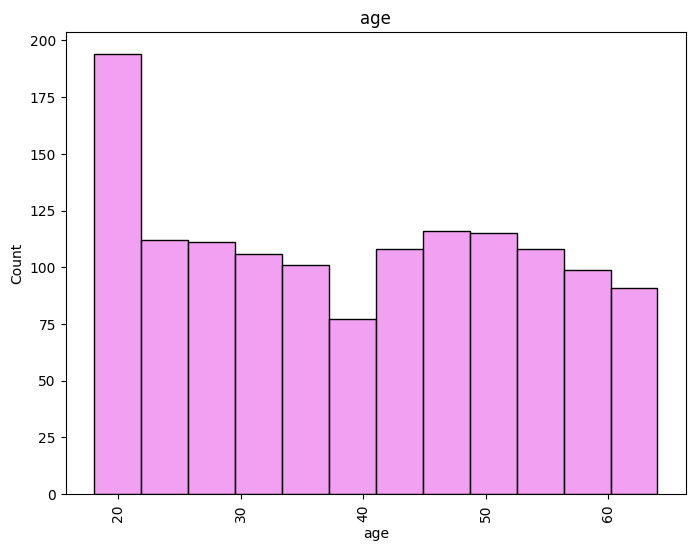

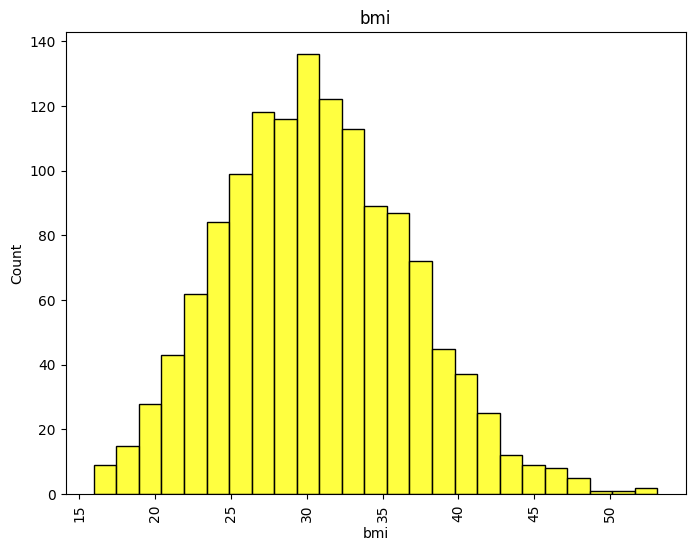

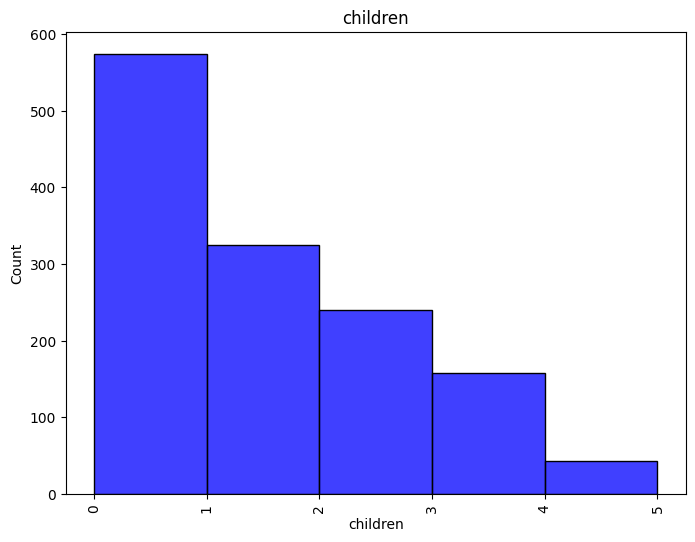

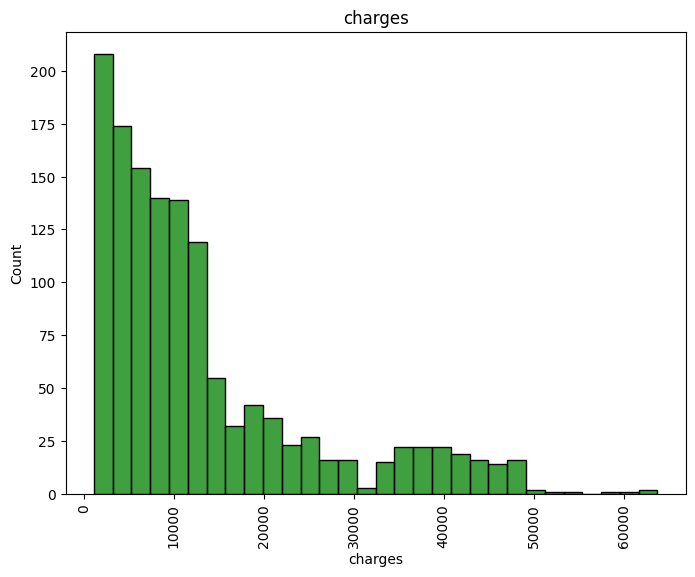

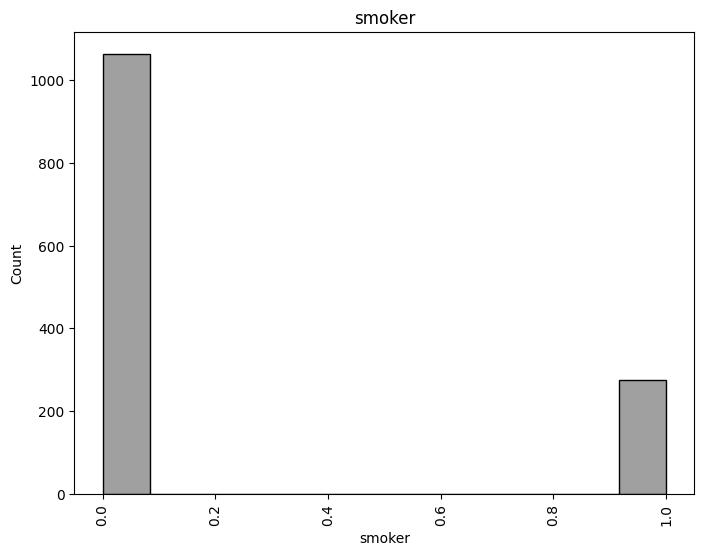

In [56]:
# Univariate analysis



# age
plt.figure(figsize=(8,6))
sns.histplot(df_train['age'], color='violet')
plt.title('age')
plt.xticks(rotation=90)
plt.show()

# bmi
plt.figure(figsize=(8,6))
sns.histplot(df_train['bmi'], color='yellow')
plt.title('bmi')
plt.xticks(rotation=90)
plt.show()

# children
plt.figure(figsize=(8,6))
sns.histplot(df_train['children'],binwidth=1, color='blue')
plt.title('children')
plt.xticks(rotation=90)
plt.show()

# charges
plt.figure(figsize=(8,6))
sns.histplot(df_train['charges'], color='green')
plt.title('charges')
plt.xticks(rotation=90)
plt.show()

# smoker
plt.figure(figsize=(8,6))
sns.histplot(df_train['smoker'], color='gray')
plt.title('smoker')
plt.xticks(rotation=90)
plt.show()

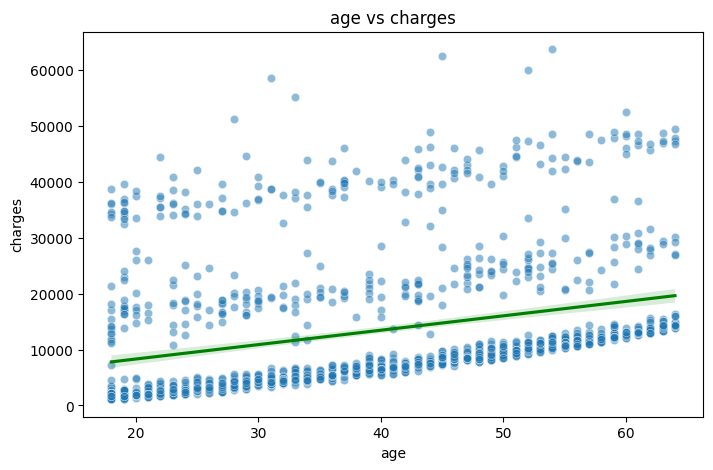

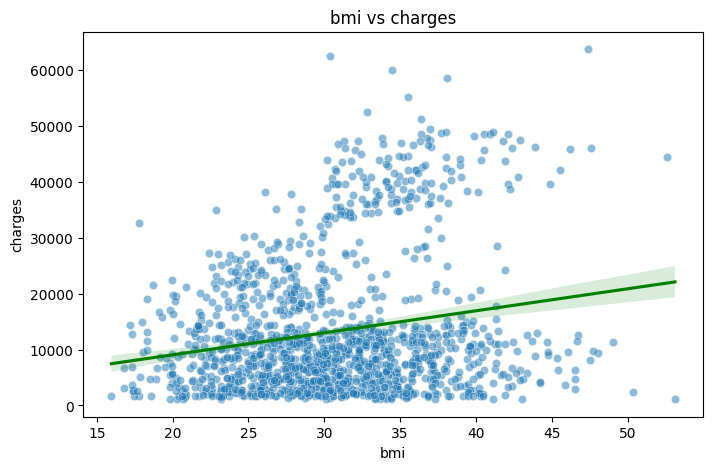

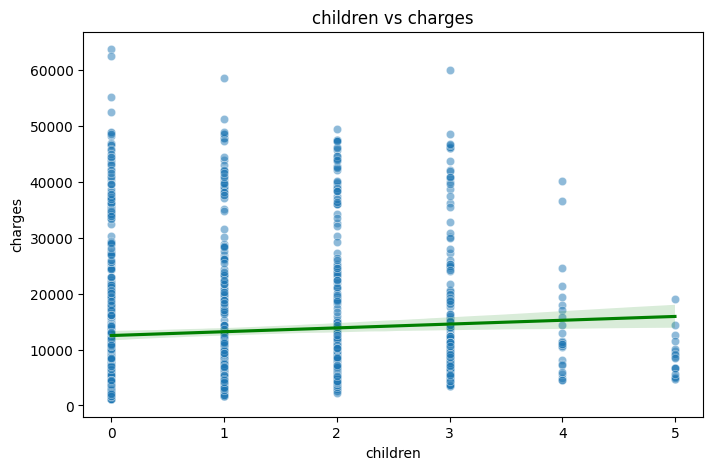

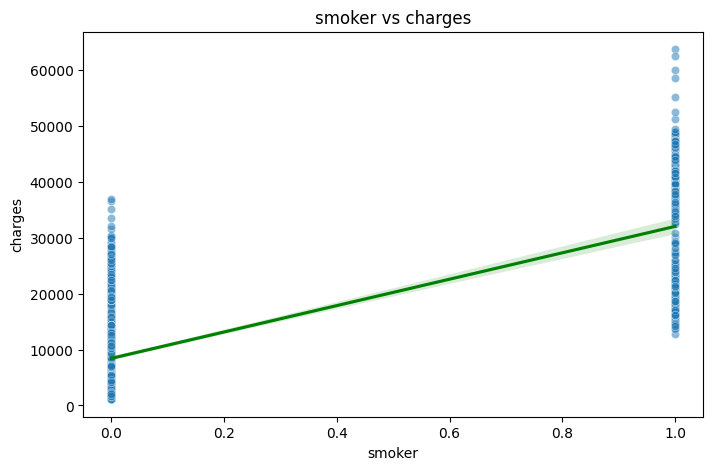

In [57]:
# Bivariate Multivariate Analysis

# age vs charges
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df_train,
    x='age',
    y='charges',
    alpha=0.5
)
sns.regplot(data=df_train, x='age', y='charges', scatter=False, color='green')
plt.title('age vs charges')
plt.show()

# bmi vs charges
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df_train,
    x='bmi',
    y='charges',
    alpha=0.5
)
sns.regplot(data=df_train, x='bmi', y='charges', scatter=False, color='green')
plt.title('bmi vs charges')
plt.show()

# children vs charges
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df_train,
    x='children',
    y='charges',
    alpha=0.5
)
sns.regplot(data=df_train, x='children', y='charges', scatter=False, color='green')
plt.title('children vs charges')
plt.show()

# smoker vs charges
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df_train,
    x='smoker',
    y='charges',
    alpha=0.5
)
sns.regplot(data=df_train, x='smoker', y='charges', scatter=False, color='green')
plt.title('smoker vs charges')
plt.show()

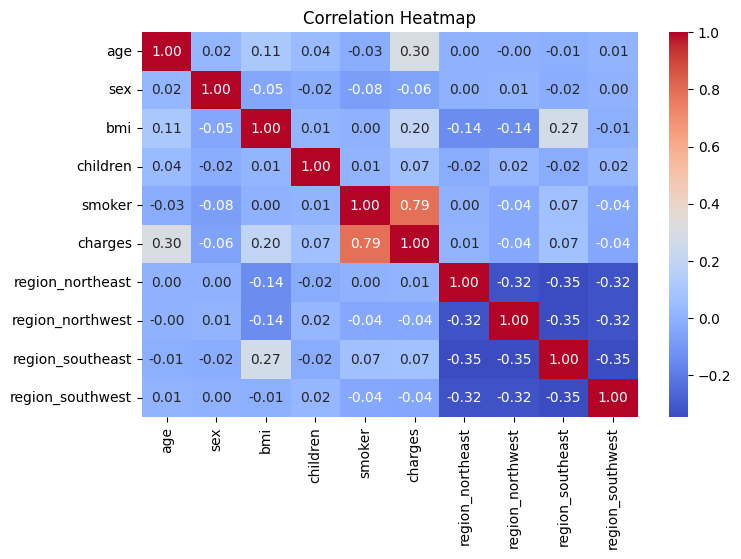

In [58]:
# Correlation Heatmap
corr = df_train.corr()

plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Modeling

In [59]:
df_train = df_train.drop(['sex','children','region_northeast','region_northwest','region_southeast','region_southwest'], axis=1)

In [60]:
# TFDF

import tensorflow_decision_forests as tfdf

def split_dataset(dataset, test_ratio=0.20):
    test_indices = np.random.rand(len(dataset)) < test_ratio
    return dataset[~test_indices], dataset[test_indices]
train_ds_pd, valid_ds_pd = split_dataset(df_train)

label = 'charges'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task=tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task=tfdf.keras.Task.REGRESSION)

rf = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.REGRESSION)
rf.compile(metrics=['mse'])

rf.fit(x=train_ds)

evaluation = rf.evaluate(x=valid_ds, return_dict=True)
for name, value in evaluation.items():
    print(f"{name}: {value: .4f}")

Use /tmp/tmpas0c9y9b as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.193165. Found 1062 examples.
Training model...


I0000 00:00:1759475708.353317      36 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1759475708.353363      36 kernel.cc:783] Collect training examples
I0000 00:00:1759475708.353372      36 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1759475708.353456      36 kernel.cc:401] Number of batches: 2
I0000 00:00:1759475708.353468      36 kernel.cc:402] Number of examples: 1062
I0000 00:00:1759475708.353554      36 kernel.cc:802] Training dataset:
Number of records: 1062
Number of columns: 4

Number of columns by type:
	NUMERICAL: 4 (100%)

Columns:

NUMERICAL: 4 (100%)
	0: "__LABEL" NUMERICAL mean:13192.4 min:1121.87 max:63770.4 sd:11947.6
	1: "age" NUMERICAL mean:39.3578 min:18 max:64 sd:13.9972
	2: "b

Model trained in 0:00:00.712456
Compiling model...
Model compiled.


I0000 00:00:1759475709.039576      36 decision_forest.cc:761] Model loaded with 300 root(s), 97850 node(s), and 3 input feature(s).
I0000 00:00:1759475709.039659      36 abstract_model.cc:1404] Engine "RandomForestOptPred" built


1/1 [==============================] - 0s 143ms/step - loss: 0.0000e+00 - mse: 26985774.0000
loss:  0.0000
mse:  26985774.0000


In [61]:
# sklearn - random_forest
X = df_train.drop("charges", axis=1)
y = df_train["charges"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_reg = RandomForestRegressor(
    n_estimators = 100,
    random_state = 42,
    n_jobs = 1
)

rf_reg.fit(X_train, y_train)

y_pred = rf_reg.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 25668135.254829608
RMSE: 5066.372988127661
R2 Score: 0.8346644445453022


In [62]:
# sklearn - LinearRegression

from sklearn.linear_model import LinearRegression

rf_Lin = LinearRegression()
rf_Lin.fit(X_train, y_train)

y_pred = rf_Lin.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 34512843.8802279
RMSE: 5874.763304187489
R2 Score: 0.7776932310583374


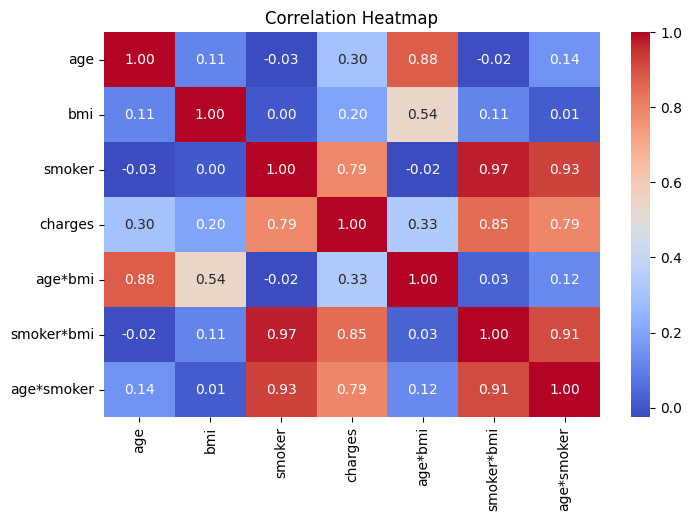

MSE: 24380201.894237455
RMSE: 4937.631202736537
R2 Score: 0.8429603793862281


In [65]:
df_train['age*bmi'] = df_train['age'] * df_train['bmi']
df_train['smoker*bmi'] = df_train['smoker'] * df_train['bmi']
df_train['age*smoker'] = df_train['smoker'] * df_train['age']

X = df_train.drop("charges", axis=1)
y = df_train["charges"]

# Correlation Heatmap
corr = df_train.corr()

plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_reg = RandomForestRegressor(
    n_estimators = 100,
    random_state = 42,
    n_jobs = 1
)

rf_reg.fit(X_train, y_train)

y_pred = rf_reg.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R2 Score:", r2_score(y_test, y_pred))

In [66]:
import pandas as pd

fi = pd.Series(rf_reg.feature_importances_, index=X_train.columns)
print(fi.sort_values(ascending=False))

smoker*bmi    0.753461
age           0.099155
age*bmi       0.083699
bmi           0.047297
age*smoker    0.012357
smoker        0.004031
dtype: float64
